In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
from multiprocessing import Pool

# Load datasets from the files
true_train_zs = np.load("train_dsl_embeddings.npy")
true_val_zs = np.load("val_dsl_embeddings.npy")
pd_zs = np.load("PD_test_dsl_embeddings.npy")

def base_kernel(x, y, sigma):
    norm_square = np.linalg.norm(x - y) ** 2
    sigma_square = sigma ** 2
    return np.exp(-norm_square / (2 * sigma_square))

def composite_kernel(x, y, sigmas):
    result = 0
    for sigma in sigmas:
        result += base_kernel(x, y, sigma)
    return result

def compute_mmd(dataset_x, dataset_y, sigmas=[1, 5, 10, 15, 20]):
    result = 0
    n = len(dataset_x)
    m = len(dataset_y)
    
    for i in range(n):
        for j in range(n):
            result += 1. / (n ** 2) * composite_kernel(dataset_x[i], dataset_x[j], sigmas)
    
    for i in range(n):
        for j in range(m):
            result -= 2. / (n * m) * composite_kernel(dataset_x[i], dataset_y[j], sigmas)
    
    for i in range(m):
        for j in range(m):
            result += 1. / (m ** 2) * composite_kernel(dataset_y[i], dataset_y[j], sigmas)
    
    return np.sqrt(result)

draws = 20
samples_per_draw = 100

for _ in range(draws):
    train_subs = true_train_zs[np.random.choice(true_train_zs.shape[0], samples_per_draw, replace=False)]

def test_mmd(train, val, test, draws=20):
    res = compute_mmd(train_subs, test)
    return res

def test_mmd_wrapper(i):
    return test_mmd(true_train_zs, true_val_zs, pd_zs[i+100:i+200])

p = Pool(20)
test_mmds = p.map(test_mmd_wrapper, [i for i in range(250)])
p.close()
p.join()

print(test_mmds)


[0.5742063773036225, 0.5758446938335416, 0.5795633728338783, 0.5837881369549976, 0.5819019505574589, 0.5824357997871241, 0.5823726383389651, 0.5799780026235223, 0.5771733074674884, 0.5771075431491465, 0.5808311553083124, 0.5812702865934373, 0.582332099899702, 0.5822862885592679, 0.5813808903201788, 0.5823190336390526, 0.5842705860602609, 0.581269026177087, 0.5780611632042509, 0.5760075592878369, 0.5768354777804334, 0.5737776573679464, 0.5731349616387342, 0.5720209247054998, 0.5717616045849259, 0.5676215219118004, 0.565144657298034, 0.5651563137094731, 0.5657383379395576, 0.5672070735044132, 0.5684697383970865, 0.5686711147252685, 0.56951917648956, 0.5697434491782981, 0.568514951483592, 0.5660056893780917, 0.5636794688270683, 0.5629396049811972, 0.564298035185362, 0.5633478691062594, 0.5629648724909336, 0.56561007728924, 0.565605096616589, 0.5635656938696806, 0.5624046471388912, 0.5605384084679863, 0.5611191841438219, 0.5594057956904392, 0.5588022476500079, 0.5590094048881094, 0.5565894

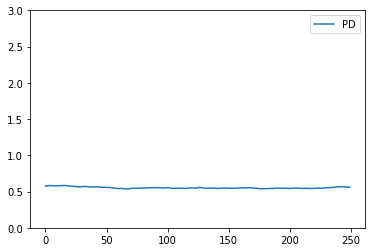

In [3]:
plt.plot(test_mmds)
plt.legend(['PD'])
plt.yticks(np.arange(0.0, 3.1, 0.5))
plt.show()


In [4]:
import numpy as np
from multiprocessing import Pool

# Load datasets from the files
true_train_zs = np.load("train_dsl_embeddings.npy")
true_val_zs = np.load("val_dsl_embeddings.npy")
pd_zs = np.load("AltPD_test_dsl_embeddings.npy")

def base_kernel(x, y, sigma):
    norm_square = np.linalg.norm(x - y) ** 2
    sigma_square = sigma ** 2
    return np.exp(-norm_square / (2 * sigma_square))

def composite_kernel(x, y, sigmas):
    result = 0
    for sigma in sigmas:
        result += base_kernel(x, y, sigma)
    return result

def compute_mmd(dataset_x, dataset_y, sigmas=[1, 5, 10, 15, 20]):
    result = 0
    n = len(dataset_x)
    m = len(dataset_y)
    
    for i in range(n):
        for j in range(n):
            result += 1. / (n ** 2) * composite_kernel(dataset_x[i], dataset_x[j], sigmas)
    
    for i in range(n):
        for j in range(m):
            result -= 2. / (n * m) * composite_kernel(dataset_x[i], dataset_y[j], sigmas)
    
    for i in range(m):
        for j in range(m):
            result += 1. / (m ** 2) * composite_kernel(dataset_y[i], dataset_y[j], sigmas)
    
    return np.sqrt(result)

draws = 20
samples_per_draw = 100

for _ in range(draws):
    train_subs = true_train_zs[np.random.choice(true_train_zs.shape[0], samples_per_draw, replace=False)]

def test_mmd(train, val, test, draws=20):
    res = compute_mmd(train_subs, test)
    return res

def test_mmd_wrapper(i):
    return test_mmd(true_train_zs, true_val_zs, pd_zs[i+100:i+200])

p = Pool(20)
altpd_test_mmds = p.map(test_mmd_wrapper, [i for i in range(250)])
p.close()
p.join()

print(altpd_test_mmds)


[0.5501639341477073, 0.5503655099861577, 0.5518535708101066, 0.5519706219142514, 0.5499041704594001, 0.5491103189425209, 0.5463844796761166, 0.5483588159044259, 0.5445007334024656, 0.5434931739832434, 0.5427075548568613, 0.5439574565038662, 0.5427423551092451, 0.5467392746904596, 0.5490863217318879, 0.5493852506051362, 0.5461961952815833, 0.5454022619018021, 0.545803521280614, 0.5461269467885169, 0.5458206510361447, 0.5448141100345586, 0.5425097796191262, 0.5452090059815236, 0.5474642072543507, 0.5490645336966024, 0.5503468064180271, 0.5502542807477463, 0.5498527137339391, 0.5504939978199427, 0.5492517096767581, 0.5511298622978235, 0.5485889807002321, 0.549295789215612, 0.5538017702786984, 0.5537882330586442, 0.550548663648478, 0.5493093019965682, 0.5498984902836099, 0.5524392609461847, 0.5525330705772233, 0.5515759388864244, 0.5520960330357193, 0.5513999275693422, 0.5511558723930199, 0.5494768033616177, 0.5484742773797846, 0.547270783779827, 0.5488941488387886, 0.5494579695463997, 0.5

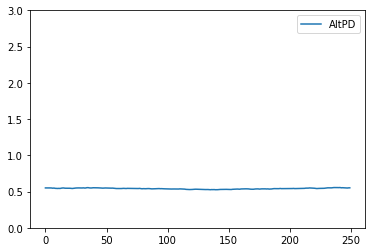

In [5]:
plt.plot(altpd_test_mmds)
plt.legend(['AltPD'])
plt.yticks(np.arange(0.0, 3.1, 0.5))
plt.show()

In [6]:
import numpy as np
from multiprocessing import Pool

# Load datasets from the files
true_train_zs = np.load("train_dsl_embeddings.npy")
true_val_zs = np.load("val_dsl_embeddings.npy")
uniform_zs = np.load("uniform_dsl_embeddings.npy")

def base_kernel(x, y, sigma):
    norm_square = np.linalg.norm(x - y) ** 2
    sigma_square = sigma ** 2
    return np.exp(-norm_square / (2 * sigma_square))

def composite_kernel(x, y, sigmas):
    result = 0
    for sigma in sigmas:
        result += base_kernel(x, y, sigma)
    return result

def compute_mmd(dataset_x, dataset_y, sigmas=[1, 5, 10, 15, 20]):
    result = 0
    n = len(dataset_x)
    m = len(dataset_y)
    
    for i in range(n):
        for j in range(n):
            result += 1. / (n ** 2) * composite_kernel(dataset_x[i], dataset_x[j], sigmas)
    
    for i in range(n):
        for j in range(m):
            result -= 2. / (n * m) * composite_kernel(dataset_x[i], dataset_y[j], sigmas)
    
    for i in range(m):
        for j in range(m):
            result += 1. / (m ** 2) * composite_kernel(dataset_y[i], dataset_y[j], sigmas)
    
    return np.sqrt(result)

draws = 20
samples_per_draw = 100

for _ in range(draws):
    train_subs = true_train_zs[np.random.choice(true_train_zs.shape[0], samples_per_draw, replace=False)]

def test_mmd(train, val, test, draws=20):
    res = compute_mmd(train_subs, test)
    return res

def unif_mmd_wrapper(i):
    return test_mmd(true_train_zs, true_val_zs, uniform_zs[i+100:i+200])

p = Pool(20)
unif_mmds = p.map(unif_mmd_wrapper, [i for i in range(250)])
p.close()
p.join()

print(unif_mmds)


[1.401568322600891, 1.401552567602973, 1.4015270545797405, 1.4015244565621947, 1.4015444707774, 1.4015592439218352, 1.4015961584552477, 1.4016720621012877, 1.401691586671189, 1.4016666529982698, 1.4016244079880362, 1.4016905633124963, 1.401649478529884, 1.4017000326681814, 1.4017095476937178, 1.4017215285503197, 1.4017748237192487, 1.401732722987025, 1.4017351235504596, 1.401738147500061, 1.401825447845583, 1.4018391593014048, 1.4017803659608992, 1.401812574815112, 1.4018324546257817, 1.4018370689322608, 1.4018107024653124, 1.4018177597219406, 1.4018028896494494, 1.4017373377917675, 1.4017754903009907, 1.4017710179263017, 1.401801895379789, 1.4017597226470657, 1.4017776827124149, 1.4018334251022069, 1.4018467781919814, 1.4019008517108358, 1.4018301047291994, 1.4018239804437012, 1.4018063458518863, 1.40178073036721, 1.4017819827902247, 1.4018806498167526, 1.4019201153478134, 1.4018888502791134, 1.4019143468555766, 1.4019168511666151, 1.4019218671291434, 1.4018906618951568, 1.40189180748

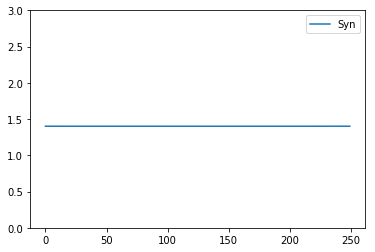

In [7]:
plt.plot(unif_mmds)
plt.legend(['Syn'])
plt.yticks(np.arange(0.0, 3.1, 0.5))
plt.show()

In [8]:
import numpy as np
from multiprocessing import Pool

# Load datasets from the files
true_train_zs = np.load("train_dsl_embeddings.npy")
true_val_zs = np.load("val_dsl_embeddings.npy")
advpd_zs = np.load("advpd_dsl_embeddings.npy")

def base_kernel(x, y, sigma):
    norm_square = np.linalg.norm(x - y) ** 2
    sigma_square = sigma ** 2
    return np.exp(-norm_square / (2 * sigma_square))

def composite_kernel(x, y, sigmas):
    result = 0
    for sigma in sigmas:
        result += base_kernel(x, y, sigma)
    return result

def compute_mmd(dataset_x, dataset_y, sigmas=[1, 5, 10, 15, 20]):
    result = 0
    n = len(dataset_x)
    m = len(dataset_y)
    
    for i in range(n):
        for j in range(n):
            result += 1. / (n ** 2) * composite_kernel(dataset_x[i], dataset_x[j], sigmas)
    
    for i in range(n):
        for j in range(m):
            result -= 2. / (n * m) * composite_kernel(dataset_x[i], dataset_y[j], sigmas)
    
    for i in range(m):
        for j in range(m):
            result += 1. / (m ** 2) * composite_kernel(dataset_y[i], dataset_y[j], sigmas)
    
    return np.sqrt(result)

draws = 20
samples_per_draw = 100

for _ in range(draws):
    train_subs = true_train_zs[np.random.choice(true_train_zs.shape[0], samples_per_draw, replace=False)]

def test_mmd(train, val, test, draws=20):
    res = compute_mmd(train_subs, test)
    return res

def pap_mmd_wrapper(i):
    return test_mmd(true_train_zs, true_val_zs, advpd_zs[i+100:i+200])

p = Pool(20)
pap_mmds = p.map(pap_mmd_wrapper, [i for i in range(250)])
p.close()
p.join()

print(pap_mmds)


[0.5930125134122196, 0.5934668550549094, 0.5904957331779911, 0.5910912432830776, 0.5908775354288184, 0.5920042182794961, 0.5926434578545402, 0.5918813653380101, 0.5907811176967337, 0.5887873099508818, 0.59180275208035, 0.5929579084889831, 0.5937598484042662, 0.5949983493927794, 0.5958557297187659, 0.5961224682621962, 0.5957198199938224, 0.5923920257737448, 0.5918671076298829, 0.5911121914999211, 0.5928797925095743, 0.5952245726958102, 0.5949133383303423, 0.598557923081724, 0.5982293074868693, 0.5973257766441405, 0.5973424436511067, 0.5982648970379112, 0.600419390978549, 0.6010166781922277, 0.601030730036584, 0.5994138610126327, 0.5980319865764754, 0.6029848136573291, 0.6028951652857114, 0.6040452989328957, 0.6018672866787474, 0.6042808756073053, 0.6059860195468036, 0.6043051683821024, 0.6050017978242218, 0.6053741535014677, 0.6078052278893193, 0.6071987932247159, 0.6077409138216048, 0.610806803894479, 0.6103872124940343, 0.6071018841413821, 0.6073794428535706, 0.608883668182864, 0.6093

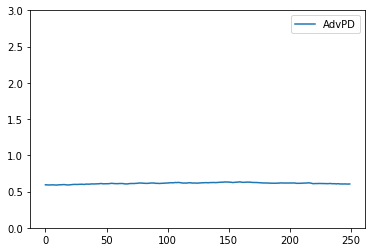

In [9]:
plt.plot(pap_mmds)
plt.legend(['AdvPD'])
plt.yticks(np.arange(0.0, 3.1, 0.5))
plt.show()

In [10]:
import numpy as np
from multiprocessing import Pool

# Load datasets from the files
true_train_zs = np.load("train_dsl_embeddings.npy")
true_val_zs = np.load("val_dsl_embeddings.npy")
img_noise_zs = np.load("img_noise_train_dsl_embeddings.npy")

def base_kernel(x, y, sigma):
    norm_square = np.linalg.norm(x - y) ** 2
    sigma_square = sigma ** 2
    return np.exp(-norm_square / (2 * sigma_square))

def composite_kernel(x, y, sigmas):
    result = 0
    for sigma in sigmas:
        result += base_kernel(x, y, sigma)
    return result

def compute_mmd(dataset_x, dataset_y, sigmas=[1, 5, 10, 15, 20]):
    result = 0
    n = len(dataset_x)
    m = len(dataset_y)
    
    for i in range(n):
        for j in range(n):
            result += 1. / (n ** 2) * composite_kernel(dataset_x[i], dataset_x[j], sigmas)
    
    for i in range(n):
        for j in range(m):
            result -= 2. / (n * m) * composite_kernel(dataset_x[i], dataset_y[j], sigmas)
    
    for i in range(m):
        for j in range(m):
            result += 1. / (m ** 2) * composite_kernel(dataset_y[i], dataset_y[j], sigmas)
    
    return np.sqrt(result)

draws = 20
samples_per_draw = 100

for _ in range(draws):
    train_subs = true_train_zs[np.random.choice(true_train_zs.shape[0], samples_per_draw, replace=False)]

def test_mmd(train, val, test, draws=20):
    res = compute_mmd(train_subs, test)
    return res

def img_mmd_wrapper(i):
    return test_mmd(true_train_zs, true_val_zs, img_noise_zs[i+100:i+200])

p = Pool(20)
img_mmds = p.map(img_mmd_wrapper, [i for i in range(250)])
p.close()
p.join()

print(img_mmds)


[0.5774719824016088, 0.578723331462918, 0.5775230704653393, 0.5758329817381035, 0.5743241598402256, 0.5745044688667739, 0.5764453184414995, 0.5760303517154797, 0.5742210499809598, 0.5711241166378476, 0.5708469494867733, 0.5721209210745706, 0.571161671517486, 0.5668049215430553, 0.5666694809624451, 0.5661545857840112, 0.5656085890528688, 0.5672783210803424, 0.5681041671546887, 0.5650652319814135, 0.5680116053203658, 0.5652290940052058, 0.5646967289886944, 0.5671962315565451, 0.5694019186275601, 0.5678424711173049, 0.567147522126847, 0.5685221952679077, 0.5681909934035267, 0.5660371633602209, 0.5680151469585772, 0.5685652101229629, 0.5677668071490795, 0.5662363809284151, 0.5655928921580701, 0.5668748631354998, 0.5656991469928044, 0.5635833571198741, 0.5626063690645429, 0.5600490782890186, 0.5602530409866997, 0.5605151131534482, 0.56013655772442, 0.5589203249830678, 0.5590021031043799, 0.5566723047218095, 0.5590603291800479, 0.5605441711413606, 0.5578701119879249, 0.555497999095177, 0.555

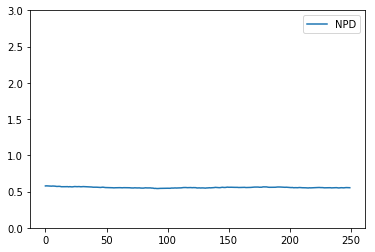

In [11]:
plt.plot(img_mmds)
plt.legend(['NPD'])
plt.yticks(np.arange(0.0, 3.1, 0.5))
plt.show()

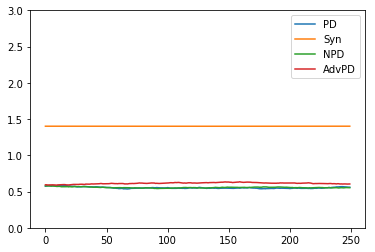

In [12]:
plt.plot(test_mmds)
plt.plot(unif_mmds)
plt.plot(img_mmds)
plt.plot(pap_mmds)

plt.legend(['PD', 'Syn', 'NPD', 'AdvPD'])
plt.yticks(np.arange(0.0, 3.1, 0.5))
plt.show()


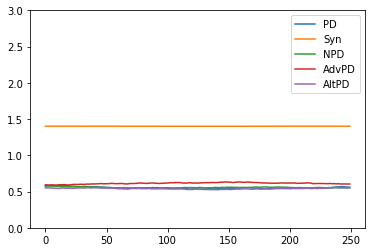

In [13]:
plt.plot(test_mmds)
plt.plot(unif_mmds)
plt.plot(img_mmds)
plt.plot(pap_mmds)
plt.plot(altpd_test_mmds)

plt.legend(['PD', 'Syn', 'NPD', 'AdvPD', 'AltPD'])
plt.yticks(np.arange(0.0, 3.1, 0.5))
plt.show()
